# Análise espectral via FFT

Se o sinal que que você precisa tratar não tem uma fórmula explícita, ou se a função, quando multiplicada por $e^{i \omega t}$ não é facilmente integrável, podemos usar a transformada rápida de Fourier (FFT).

A FFT é um algoritmo para calcular a tranforma de Fourier discreta de maneira eficiente, e é um dos algoritmos mais importantes da ciência computacional.

Vamos considerar apenas sinais periódicos aqui, apesar de ser possível e muito útil usar a FFT em sinais não periódicos com o uso de técnicas adequadas.

# Setup

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Funções simples
Vamos calcular a FFT de algumas funções simples.

In [3]:
tau = 1
w0 = 2*np.pi/tau
nt = 1024

times = np.linspace(0, tau, nt) 

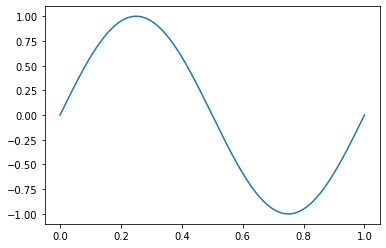

In [6]:
fsin = np.sin(times*w0)
fig, ax = plt.subplots()
p = ax.plot(times, fsin)

In [ ]:
### FFT

array([ 6.89552582e-15+0.00000000e+00j,  1.57002403e+00-5.11746664e+02j,
       -4.09727262e-03+6.67743239e-01j, -3.45566468e-03+3.75446586e-01j,
       -3.27610817e-03+2.66947909e-01j, -3.19916793e-03+2.08536966e-01j,
       -3.15886890e-03+1.71585814e-01j, -3.13505680e-03+1.45958935e-01j,
       -3.11979302e-03+1.27086278e-01j, -3.10941382e-03+1.12583750e-01j])

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

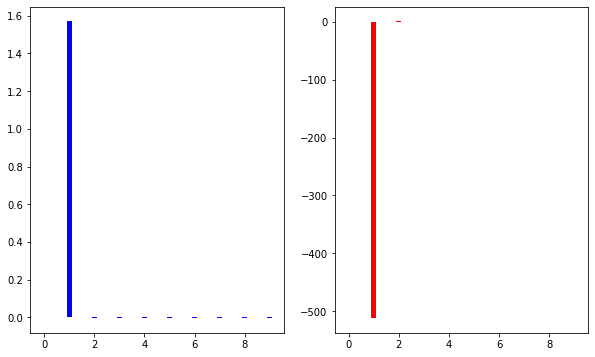

In [19]:
ft = np.fft.rfft(fsin)
ff = np.fft.rfftfreq(fsin.size, tau/fsin.size) # cycles/second
display(ft[:10])
display(ff[:10])

fig, ax = plt.subplots(1,2)
fig.set_size_inches((10, 6))
p = ax[0].bar(ff[:10], ft.real[:10], width=0.2, color='b', align='center')
p = ax[1].bar(ff[:10], ft.imag[:10], width=0.2, color='r', align='center')

# Função "complicada"

Vamos primeiro usar a fft para calcular a FFT de uma função que o SymPy não consegue calcular a série de Fourier analiticamente, $f(t) = A e^{-t^2}$, no intervalo $[-\tau/2, \tau/2]$.

In [ ]:
def my_fun(times, A=10, tau=2):
  "Um período da função!"
  return A*np.exp(-times**2)

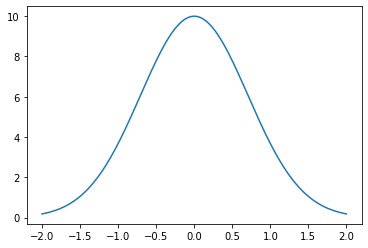

In [ ]:
tau = 4.0
lim = 0.5*tau
npoints = 200

times = np.linspace(-lim, lim, npoints)
ft = my_fun(times, tau=tau)
fig, ax = plt.subplots()
ax.plot(times, ft)
fig.show()

In [ ]:
fw = np.fft.rfft(ft)
freqs = np.fft.rfftfreq(len(ft))
display(fw[:10])
display(freqs[:10])

array([ 8.77851686e+02+0.j        , -4.82312557e+02-7.5767711j ,
        7.38410195e+01+2.32054752j, -5.56671260e+00-0.2625195j ,
       -1.30502143e+00-0.08210499j, -9.60810400e-01-0.07561742j,
       -7.04273971e-01-0.06657349j, -5.33774780e-01-0.05892928j,
       -4.16414487e-01-0.05260538j, -3.32848598e-01-0.04737137j])

array([0.   , 0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 ,
       0.045])

In [ ]:
f = 1/tau
w = 2*np.pi*f
print(f)
print(w)

0.25
1.5707963267948966


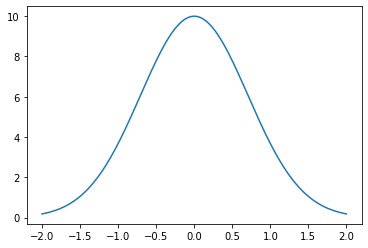

In [ ]:
ift = np.fft.irfft(fw, len(ft))
fig, ax = plt.subplots()
ax.plot(times, np.abs(ift))
fig.show()